In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')

In [3]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
columns = ['wavelet_transformed_variance','wavelet_transformed_skewness','wavelet_transformed_curtosis','image_entropy','class']

In [5]:
# Giving column names

df = pd.read_csv('data_banknote_authentication.csv', names = columns)

In [6]:
df.head()

,wavelet_transformed_variance,wavelet_transformed_skewness,wavelet_transformed_curtosis,image_entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wavelet_transformed_variance  1372 non-null   float64
 1   wavelet_transformed_skewness  1372 non-null   float64
 2   wavelet_transformed_curtosis  1372 non-null   float64
 3   image_entropy                 1372 non-null   float64
 4   class                         1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df['class'].value_counts()

#So the data is balanced
#No problemo

0    762
1    610
Name: class, dtype: int64

In [10]:
df.describe()

,wavelet_transformed_variance,wavelet_transformed_skewness,wavelet_transformed_curtosis,image_entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


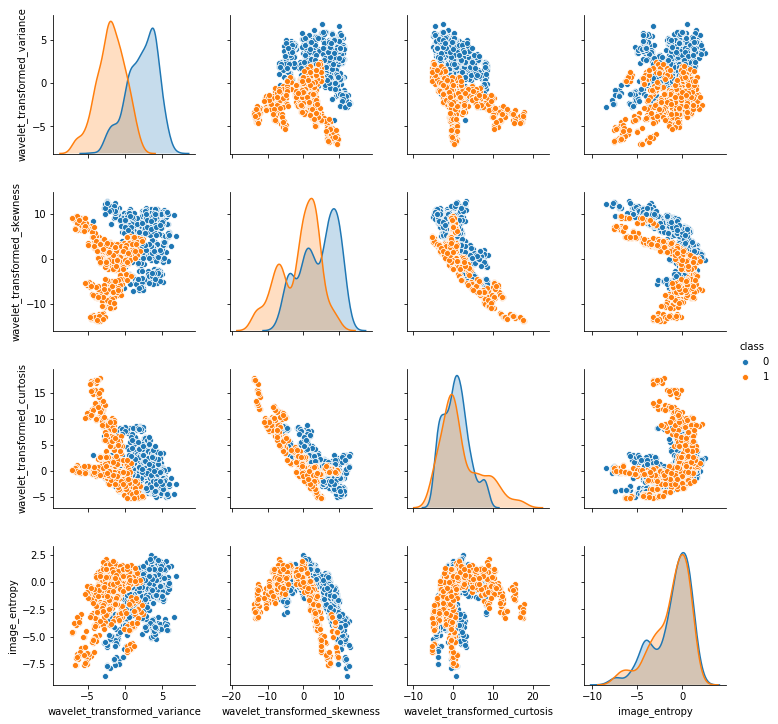

In [11]:
sns.pairplot(df,hue='class')
plt.show()

In [12]:
X = df.drop('class' , axis= 1)
X.head()

,wavelet_transformed_variance,wavelet_transformed_skewness,wavelet_transformed_curtosis,image_entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [14]:
# Scaling the dataset

from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
X = scaler.transform(X)

In [18]:
X

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (960, 4) (960,)
Test set: (412, 4) (412,)


### Prediction

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier()

In [24]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = tree.predict(X_test)

### Evaluation

In [26]:
from sklearn import metrics

In [27]:
precision = metrics.accuracy_score(y_pred, y_test)*100
print("Accuracy :{}".format(precision))

Accuracy :98.30097087378641


In [28]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred) 

In [29]:
matrix

array([[229,   0],
       [  7, 176]], dtype=int64)

In [30]:
# So
print("right predictions: {}". format(matrix[0][0]+matrix[1][1]))
print("wrong predictions: {}". format(matrix[0][1]+matrix[1][0]))

right predictions: 405
wrong predictions: 7


##### Cross entropy

In [31]:
from sklearn.metrics import log_loss

In [32]:
loss = log_loss(y_test, y_pred)

In [33]:
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))


# L(p)=0.5 means, on average, you attributed to the right class the probability p≈0.61 across samples.
# Source- StackExchange

Log Loss / Cross Entropy = 0.5868


### Pruning

##### Visualize the tree



In [ ]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())



# Source- Medium

- __Criterion__: defines what function will be used to measure the quality of a split. The options are “gini” and “entropy”.
- __Max_depth__: defines the maximum depth of the tree. If it’s “none”, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model)

In [ ]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Criterion=gini', metrics.accuracy_score(y_test, y_pred))

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Criterion=entropy', metrics.accuracy_score(y_test, y_pred))

In [ ]:
#Now, let’s check if pruning the tree using max_depth can give us any better results. 
#In the code chunk below, I create a simple function to run our model using different values for max_depth (from 1 to 30) and 
#visualize its results to see how the accuracy differs for each value.

#Source- Medium

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 tree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 tree.fit(X_train, y_train)
 y_pred = tree.predict(X_test)
 acc_gini.append(metrics.accuracy_score(y_test, y_pred))
 ####
 tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 tree.fit(X_train, y_train)
 y_pred = tree.predict(X_test)
 acc_entropy.append(metrics.accuracy_score(y_test, y_pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

By seeing the upper plot we can say __Entropy__ works better than __gini__.

and after __max_depth__ = 7(approx) accuracy becomes constant

- Now, we create the tree with max_depth=7 and criterion=entropy

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

In [ ]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())



# Source- Medium

#### Cross-Entropy After Prunning

In [ ]:
loss = log_loss(y_test, y_pred)
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred) 

In [ ]:
matrix

In [ ]:
print("right predictions: {}". format(matrix[0][0]+matrix[1][1]))
print("wrong predictions: {}". format(matrix[0][1]+matrix[1][0]))